<h1>Micrometeoroid detection on lunar surface via accelerometer data</h1>
<h2>Approach:</h2> Accelerometer data consists of acceleration versus time. Acceleration data is separately recorded
for three directions.As I have observed there is no strong correlation between the data of three components.So I'll proceed with finding maximas in one stream of data.To separate micrometeoroid impact part in the signal, we'll have to decide some threshold amplitude. If the amplitude of signal exceeds the threshold we'll store the time and amplitude of signal at that point in a different list.(This is done using indices)


In [1]:
'''Importing libraries for functionalities'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''Creating functions for detection and isolation of specific part of input signal '''

def Detect_maxim(data,thresh_Amplitude):
    '''The function takes data as array and threshhold amplitude as specified ,It will return another array
    consisting specifically of the parts of data above threshold amplitude.Rest all will be set to zero.'''
    filtered_Data=list(data)
    filtered_Data=np.array(filtered_Data)
    for i in range(np.size(data)):
        if abs(data[i])>=thresh_Amplitude:
            filtered_Data[i]=data[i]
        else:
            filtered_Data[i]=0
    return filtered_Data  

It is possible that we may get single or double points as maxima due to some reason( try later).We may get also get one or two break points within our expected continuous maxima.So there is need to eliminate such points from our data. 

In [3]:
def Filter_maxim(filtered_Data):
    '''This function takes filtered data as an array and returns an array in which the expected continuous maximas are left.'''
    for i in range(np.size(filtered_Data)-2):
        if filtered_Data[i]!=0.0 and filtered_Data[i+1]==0 and filtered_Data[i+2]!=0:
            filtered_Data[i+1]=0.0001*filtered_Data[i]
    
    return filtered_Data

In [4]:
def Count_maxim(data):
    '''This function takes filtered data of accelerometer as input and returns number of peaks or maximas as output'''
    count=0

    for i in range(np.size(data)-1):
        if data[i]!=0 and abs(data[i+1])==0:
            count=count+1
    return count
            
            

In [5]:
def isolate_maxim(data):
    '''This function takes data as input and returns isolated maximas(indices only) along with width as two lists
    where the first list is the list of isolated maximas(odd=starting index,even=ending index) and second is width'''
    a=list()
    c=list()
    b=0
    if data[0]!=0:
        a.append(0)
    for i in range(np.size(data)-1):
        if data[i]==0 and data[i+1]!=0:
            a.append(i+1)
        elif  data[i]!=0 and data[i+1]==0:
            a.append(i)
    for i in range(int(len(a)/2)):
            c.append(a[2*i+1]-a[2*i]+1)
    return a,c


In [6]:

'''b=list()
c=list()
for j in range(int(len(ad)/2)):
    for i in range(ad[2*j],ad[2*j+1]):
        b.append(abs(d[i]))
    c.append(max(b))
    for i in range(int(a[2*j+1]-a[2*j])+1):
        b[i]=0
    
b,c'''

'b=list()\nc=list()\nfor j in range(int(len(ad)/2)):\n    for i in range(ad[2*j],ad[2*j+1]):\n        b.append(abs(d[i]))\n    c.append(max(b))\n    for i in range(int(a[2*j+1]-a[2*j])+1):\n        b[i]=0\n    \nb,c'

In [7]:
b=[1.0,2.0,3.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0]
b=np.array(list(b))
c=Detect_maxim(b,2)
c

array([0., 2., 3., 4., 2., 2., 2., 0., 2., 2., 0., 0., 0., 0., 0., 2., 0.,
       0.])

In [8]:
d=Filter_maxim(c)
d

array([0.e+00, 2.e+00, 3.e+00, 4.e+00, 2.e+00, 2.e+00, 2.e+00, 2.e-04,
       2.e+00, 2.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 2.e+00,
       0.e+00, 0.e+00])

In [9]:
Count_maxim(d)

2

In [10]:
ad,bs=isolate_maxim(d)
print(ad,bs)

[1, 9, 15, 15] [9, 1]


In [11]:
#creating a sine pulse as input
Theta=np.linspace(0,6*np.pi,1000)#theta =integral of angular velpcity wrt time,in discrete case this will be equal to cumulaitve 
sine_Pulse=np.sin(Theta)
list1=list(sine_Pulse)
for i in range(750):
    list1.append(0);
#Creating array for final signal
signal_Input=np.array(list1);

In [12]:
filter1=Detect_maxim(signal_Input,0.001)
filter1

array([0.        , 0.0188673 , 0.03772789, ..., 0.        , 0.        ,
       0.        ])

In [13]:
filter2=Filter_maxim(filter1)
filter2

array([0.        , 0.0188673 , 0.03772789, ..., 0.        , 0.        ,
       0.        ])

In [14]:
filter3=Count_maxim(filter2)
filter3

1

In [15]:
filter4=isolate_maxim(filter2)
filter4

([1, 998], [998])

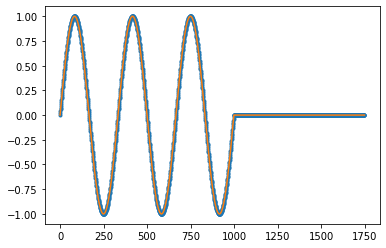

In [16]:
plt.plot(np.arange(0,1750,1),filter1,'.')
plt.plot(np.arange(0,1750,1),signal_Input)

In [17]:
import scipy.signal as signal#this is useful only for continuous waveform

In [18]:
signal.find_peaks(abs(signal_Input))

(array([ 83, 250, 416, 583, 749, 916], dtype=int64), {})

In [19]:
data_Initial= pd.read_csv('elcentro.dat', sep = ' \t ',engine='python')
time=np.array(data_Initial.iloc[::,0])
accl=np.array(data_Initial.iloc[::,1])

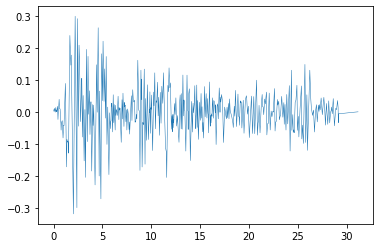

In [20]:
plt.plot(time,accl,linewidth='0.5')

In [21]:
filter1=Detect_maxim(accl,0.001)
filter1

array([0.0063 , 0.00364, 0.     , ..., 0.     , 0.     , 0.     ])

In [22]:
filter2=Filter_maxim(filter1)
filter2

array([6.30e-03, 3.64e-03, 3.64e-07, ..., 0.00e+00, 0.00e+00, 0.00e+00])

In [23]:
filter3=Count_maxim(filter2)
filter3

2

In [24]:
filter4=isolate_maxim(filter2)
filter4

([0, 1123, 1126, 1542], [1124, 417])